In [1]:
# import packages
import pyscf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def perform_hf_calc(structure, n_unpaired=0):
    # create molecule and run UHF calculation
    mol = pyscf.gto.Mole()
    mol.build(
        atom = structure, # default distance unit is angstrom
        basis = "sto-3g",
        unit = 'bohr',  # specify Bohr units: default is A but underlying calculations of AO stuff is in Bohr.
        symmetry="C1",
        spin=n_unpaired,
    )
    n_electrons = mol.nelec[0] + mol.nelec[1]
    if n_electrons % 2:
        mf = pyscf.scf.UHF(mol)
    else:
        mf = pyscf.scf.RHF(mol) # init HF object
    energy = mf.kernel() # run SCF

    mo_coeff = mf.mo_coeff
    mo_energy = mf.mo_energy

    return energy, mo_coeff, mo_energy

In [3]:
calc_data = {}

In [4]:
calc_data['HF'] = perform_hf_calc(
"""
H 0 0 0
F 0 0 2
"""
)

converged SCF energy = -98.5615614516751


In [5]:
calc_data['H'] = perform_hf_calc(
"""
H 0 0 0
""",
n_unpaired=1
)

converged SCF energy = -0.466581849557275  <S^2> = 0.75  2S+1 = 2


In [6]:
calc_data['F'] = perform_hf_calc(
"""
F 2 0 0
""",
n_unpaired=1
)

converged SCF energy = -97.9865049587359  <S^2> = 0.75  2S+1 = 2


In [7]:
calc_data

{'HF': (-98.56156145167509,
  array([[-4.34041963e-03,  1.29448667e-01, -5.61523893e-01,
          -2.72014566e-17,  8.40121146e-41,  9.75564823e-01],
         [ 9.94851830e-01, -2.54133024e-01, -6.73355676e-02,
           2.55426148e-17, -2.22823083e-41,  6.96612376e-02],
         [ 2.14624829e-02,  9.70080509e-01,  3.49791077e-01,
          -8.66963420e-17,  7.23378973e-41, -4.17581169e-01],
         [-1.89950940e-18,  6.71735896e-17,  1.04069590e-16,
           1.00000000e+00,  3.89551668e-40,  8.38807007e-17],
         [ 7.00870219e-43, -7.68199611e-41, -2.69875459e-40,
          -3.89551668e-40,  1.00000000e+00, -2.31257159e-40],
         [-2.03761200e-03, -5.29296604e-02,  6.90346700e-01,
          -1.92870083e-16,  3.66483844e-40,  7.96692473e-01]]),
  array([-25.91286094,  -1.43684543,  -0.54164986,  -0.46200329,
          -0.46200329,   0.49505952])),
 'H': (-0.46658184955727533,
  array([[[1.]],
  
         [[1.]]]),
  array([[-0.46658185],
         [-0.46658185]])),
 'F': (-

In [8]:
calc_data['H'][2]

array([[-0.46658185],
       [-0.46658185]])

In [9]:
calc_data['H'][1]

array([[[1.]],

       [[1.]]])

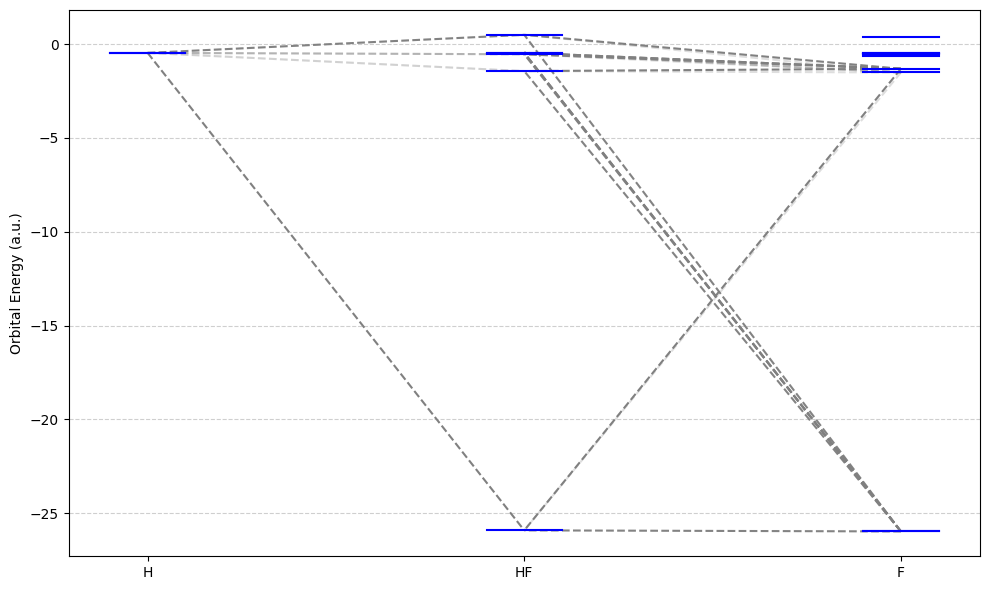

In [23]:
# Extract energy levels and coefficients
H_energies = calc_data['H'][2].flatten()
HF_energies = calc_data['HF'][2]
F_energies = calc_data['F'][2].flatten()

H_coefficients = np.abs(calc_data['H'][1].flatten()) 
HF_coefficients = np.abs(calc_data['HF'][1])
F_coefficients = np.abs(calc_data['F'][1].flatten())

# Normalize coefficients for alpha scaling
H_coefficients /= np.max(H_coefficients)
HF_coefficients /= np.max(HF_coefficients)
F_coefficients /= np.max(F_coefficients)

# Define positions for each species on the x-axis
positions = {'H': 1, 'HF': 2, 'F': 3}

# Plot the MO diagram
plt.figure(figsize=(10, 6))

# Plot H energies and connect to HF
for i, energy in enumerate(H_energies):
    plt.plot([positions['H'] - 0.1, positions['H'] + 0.1], [energy, energy], 'b-', label='H AO' if i == 0 else "", zorder=100)
    for j, hf_energy in enumerate(HF_energies):
        plt.plot([positions['H'], positions['HF']],
                 [energy, hf_energy],
                 '--', c='grey', alpha=HF_coefficients[i, j])

# Plot HF energies
for energy in HF_energies:
    plt.plot([positions['HF'] - 0.1, positions['HF'] + 0.1], [energy, energy], 'b-', label='HF MO' if energy == HF_energies[0] else "", zorder=100)

# Plot F energies and connect to HF
for i, energy in enumerate(F_energies):
    plt.plot([positions['F'] - 0.1, positions['F'] + 0.1], [energy, energy], 'b-', label='F AO' if i == 0 else "", zorder=100)
    for j, hf_energy in enumerate(HF_energies):
        plt.plot([positions['F'], positions['HF']],
                 [energy, hf_energy],
                 '--', c='grey', alpha=F_coefficients[i])

# Add labels and title
plt.xticks(list(positions.values()), list(positions.keys()))
plt.ylabel("Orbital Energy (a.u.)")
# plt.ylim(-5, 1)
# plt.title("MO Diagram: H, HF, and F with AO Contributions")
# plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()